## Import modules

In [1]:
from common_dirs_fns import *
from propy_functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import subprocess
from Bio.SeqUtils.ProtParam import ProteinAnalysis

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
# Specify matplotlib formatting
%matplotlib inline
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['axes.linewidth'] = 1.
mpl.rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size': 7})

## Specify figures path and import human AMP information

In [3]:
# Specify directory for figures corresponding to library properties
library_props_figs_path = figures_path+'library_properties/'

# Import human AMP peptide information scraped from APD3
peptides_df = pd.read_excel(peptides_df_path,index_col=0)

## Analyze clusters

In [4]:
# Generate a fasta file for all peptides in stats_table as an input for usearch
to_fasta(peptides_df,
         'Sequence',
         'Sequence',
         analysis_path + 'hAMP_clusters/hAMPs_table.fasta')

# Cluster peptides using usearch
linkages = np.arange(0.1, 1., 0.01)
cluster_sizes = []

clusters_dict = {}

for linkage_num in linkages:
    print(linkage_num)
    prefix = '"' + analysis_path + 'hAMP_clusters/hAMPs_table'
    infile = prefix+'.fasta"'
    mxfile = prefix+'_mx.txt"'
    outfile = prefix+'_'+'{:.2f}'.format(linkage_num).split('.')[1]+'_clusters.txt"'
    subprocess.run(usearch_path+' -calc_distmx '+infile+' -tabbedout '+mxfile)
    
    # Average linkage uses distance between cluster centers
    subprocess.run(usearch_path+' -cluster_aggd '+mxfile+' -clusterout '+outfile
                   +' -id '+str(linkage_num)+' -linkage avg')

    # Read back cluster information and add it to stats_tablel
    clusters = pd.read_csv(outfile[1:-1], sep="\t", header=None)
    clusters.columns = ['ClusterNum','Query']
    clusters = clusters.set_index('Query')
    
    clusters_dict[np.round(linkage_num, decimals=2)] = clusters
    cluster_sizes.append(len(clusters['ClusterNum'].unique()))

0.1
0.11
0.12
0.13
0.13999999999999999
0.14999999999999997
0.15999999999999998
0.16999999999999998
0.17999999999999997
0.18999999999999995
0.19999999999999996
0.20999999999999996
0.21999999999999995
0.22999999999999995
0.23999999999999994
0.24999999999999992
0.2599999999999999
0.2699999999999999
0.2799999999999999
0.2899999999999999
0.29999999999999993
0.30999999999999994
0.3199999999999999
0.32999999999999985
0.33999999999999986
0.34999999999999987
0.3599999999999999
0.3699999999999999
0.3799999999999999
0.3899999999999999
0.3999999999999998
0.4099999999999998
0.4199999999999998
0.4299999999999998
0.43999999999999984
0.44999999999999984
0.45999999999999985
0.46999999999999986
0.47999999999999976
0.48999999999999977
0.4999999999999998
0.5099999999999998
0.5199999999999998
0.5299999999999998
0.5399999999999998
0.5499999999999998
0.5599999999999997
0.5699999999999997
0.5799999999999997
0.5899999999999997
0.5999999999999998
0.6099999999999998
0.6199999999999998
0.6299999999999997
0.639999

Threshold of 0.7 yields reasonable clusters

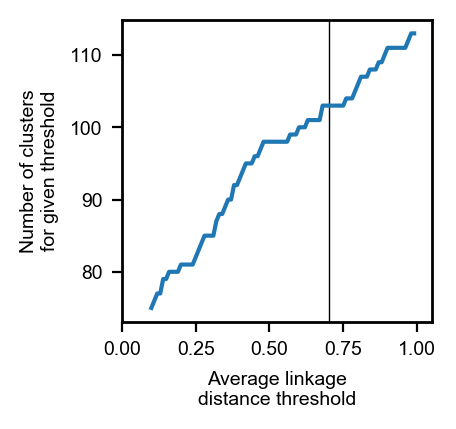

In [5]:
# Plot number of thresholds per linkage threshold

plt.figure(figsize=(2., 2.), dpi=200)

plt.plot(linkages, cluster_sizes)
plt.xlim([0., 1.05])
plt.xlabel('Average linkage\ndistance threshold')
plt.ylabel('Number of clusters\nfor given threshold')
plt.axvline(0.7, zorder=-1, color='k', linewidth=0.5)

In [6]:
# Threshold of 0.7 yields reasonable clusters
cluster_i = clusters_dict[0.7]

for cn in cluster_i['ClusterNum'].unique():
    if len(cluster_i[cluster_i['ClusterNum']==cn])<2:
        continue
    print('Cluster ' + str(cn))
    for c in cluster_i[cluster_i['ClusterNum']==cn].index:
        print(peptides_df.set_index('Sequence').loc[c, 'SimpleName'])
        print(c)
    print('\n')

Cluster 0
human neutrophil peptide-1
ACYCRIPACIAGERRYGTCIYQGRLWAFCC
human neutrophil peptide-2
CYCRIPACIAGERRYGTCIYQGRLWAFCC
human neutrophil peptide-3
DCYCRIPACIAGERRYGTCIYQGRLWAFCC


Cluster 1
human LEAP-1
DTHFPICIFCCGCCHRSKCGMCCKT
Hepcidin
ICIFCCGCCHRSKCGMCCKT


Cluster 2
Human TC-2
NLAKGKEESLDSDLYAELRCMCIKTTSGIHPKNIQSLEVIGKGTHCNQVEVIATLKDGRKICLDPDAPRIKKIVQKKLAGDES
Thrombocidin-1
AELRCMCIKTTSGIHPKNIQSLEVIGKGTHCNQVEVIATLKDGRKICLDPDAPRIKKIVQKKLAGDES


Cluster 3
Beta-amyloid peptide (1-40)
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV
Beta-amyloid peptide (1-42)
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA


Cluster 4
Defensin DEFB126
NWYVKKCLNDVGICKKKCKPEEMHVKNGWAMCGKQRDCCVPADRRANYPVFCVQTKTTRISTVTATTATTTLMMTTASMSSMAPTPVSPTG
hBD-26
WYVKKCLNDVGICKKKCKPEEMHVKNGWAMCGKGRDCCVPAD


Cluster 5
LL-23
LLGDFFRKSKEKIGKEFKRIVQR
TLN-58
TLNQARGSFDISCDKDNKRFALLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
human LL-29
LLGDFFRKSKEKIGKEFKRIVQRIKDFLR
ALL-38
ALLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES
human KR-20
KRIVQRIKDFLRNL

## Calculate human AMP properties

In [7]:
# Create a new dataframe to store AMP properties
hAMP_df = peptides_df.copy()
hAMP_df = hAMP_df.set_index('Sequence')
hAMP_df['Cluster'] = hAMP_df.index.map(lambda x: clusters_dict[0.7].loc[x, 'ClusterNum'])

# Charge
hAMP_df['Charge'] = hAMP_df.index.map(calculate_charge)

# Grand average of hydropathicity
hAMP_df['GRAVY'] = hAMP_df.index.map(lambda x: ProteinAnalysis(x).gravy())

# Length
hAMP_df['Length'] = hAMP_df.index.map(lambda x: len(x))

# Only AMPs <= 104 aa in length are in the library
hAMP_df['InLibrary'] = hAMP_df['Length'] <= 104

# Save new dataframe to Analysis
hAMP_df.to_excel(analysis_path+'human_AMP_properties.xlsx')

### Plot length

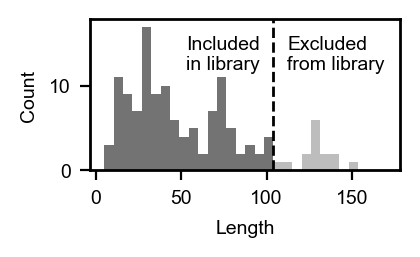

In [8]:
plt.figure(figsize=(2., 1.), dpi=200)
bins = np.arange(hAMP_df['Length'].min(), hAMP_df['Length'].max()+1, 5.5)
plt.hist(hAMP_df[hAMP_df['InLibrary']]['Length'], bins=bins, color='#737373')
plt.hist(hAMP_df[~hAMP_df['InLibrary']]['Length'], bins=bins, color='#bdbdbd')
plt.axvline(104, color='k', linestyle='--', linewidth=1.)
text_offset=8
plt.text(104-text_offset, 16, 'Included\nin library', horizontalalignment='right', verticalalignment='top')
plt.text(104+text_offset, 16, 'Excluded\nfrom library', horizontalalignment='left', verticalalignment='top')
plt.xlabel('Length')
plt.ylabel('Count')
plt.savefig(library_props_figs_path+'Length.svg', bbox_inches='tight')

### Plot charge and GRAVY

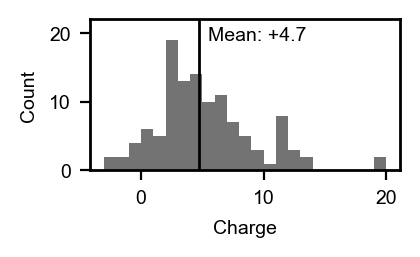

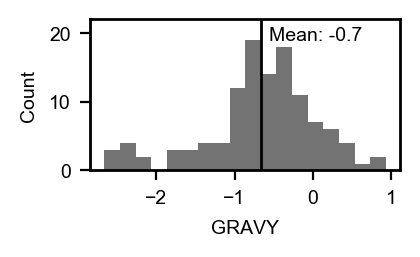

In [9]:
stepsize={'Charge': 1,
         'GRAVY': 0.2}

for metric in ['Charge', 'GRAVY']:
    plt.figure(figsize=(2., 1.), dpi=200)
    bins = np.arange(hAMP_df[hAMP_df['InLibrary']][metric].min(),
                            hAMP_df[hAMP_df['InLibrary']][metric].max()+stepsize[metric],
                            stepsize[metric])
    h = plt.hist(hAMP_df[hAMP_df['InLibrary']][metric],
             bins=bins, color='#737373')
    
    mean = hAMP_df[hAMP_df['InLibrary']][metric].mean()
    plt.axvline(mean, color='k', linestyle='-', linewidth=1.)
    plt.text(mean+0.03*(h[1][-1] - h[1][0]), h[0].max(), 'Mean: '+'{:+.1f}'.format(mean))
    plt.xlabel(metric)
    plt.ylabel('Count')
    plt.ylim([0, 22])
    plt.savefig(library_props_figs_path+metric+'.svg', bbox_inches='tight')

### Plot secondary structure

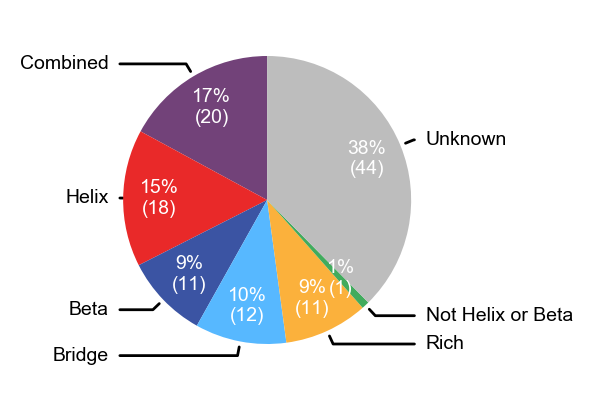

In [10]:
fig = plt.figure(figsize=(1.8, 1.8), dpi=200)
ax = fig.add_axes([0,0,1,1])

data = hAMP_df[hAMP_df['InLibrary']]['3D Structure'].value_counts().reindex(['Combined','Helix','Beta','Bridge',
                                                      'Rich','Not Helix or Beta','Unknown'])

labels=data.index

colors_dict = {'Combined':'#724279',
               'Helix':'#E92929', #red
               'Beta':'#3B54A3', #blue
               'Bridge':'#57B8FF',
               'Rich':'#FBB13C',
               'Not Helix or Beta':'#41ab5d', #'#737373',
               'Unknown':'#bdbdbd'}


# Adapted from Matplotlib documentation:
# https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html
        
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, startangle=90,
                                  autopct=lambda pct: func(pct, data),
                                  colors=pd.Series(labels).apply(lambda x: colors_dict[x]),
                                  textprops=dict(color="w"),
                                  pctdistance=.75,
                                  )

kw = dict(arrowprops=dict(arrowstyle="-"),
          zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.1*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment,
                verticalalignment='top',
                **kw)

fig.savefig(library_props_figs_path+'/SecondaryStructure.svg',dpi=300,bbox_inches='tight')

### Plot cluster distributions

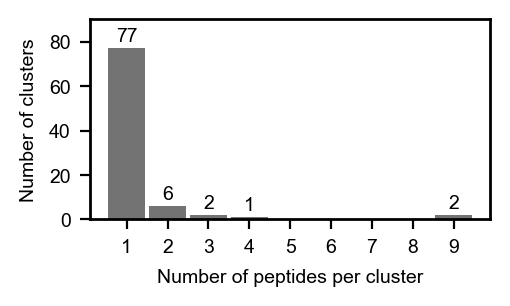

In [11]:
fig = plt.figure(figsize=(2., 1.), dpi=200)
ax = fig.add_axes([0,0,1,1])

bins = np.arange(0, 10, 1)
cluster_sizes = pd.Series(Counter(hAMP_df[hAMP_df['InLibrary']]['Cluster'].value_counts()),
                 index=bins)

plt.bar(cluster_sizes.index, cluster_sizes.values,
        color='#737373', width=0.9)

plt.xlabel('Number of peptides per cluster')
plt.ylabel('Number of clusters')

for i in range(len(cluster_sizes)):
    if np.isnan(cluster_sizes.values[i]):
        continue
    plt.text(cluster_sizes.index[i],
             cluster_sizes.values[i]+3,
             '{:.0f}'.format(cluster_sizes.values[i]),
             horizontalalignment='center')
    
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim([0,90])

fig.savefig(library_props_figs_path+'/cluster_sizes.svg', bbox_inches='tight')